Initial shape: (50000, 7)
After feature engineering: (50000, 13)


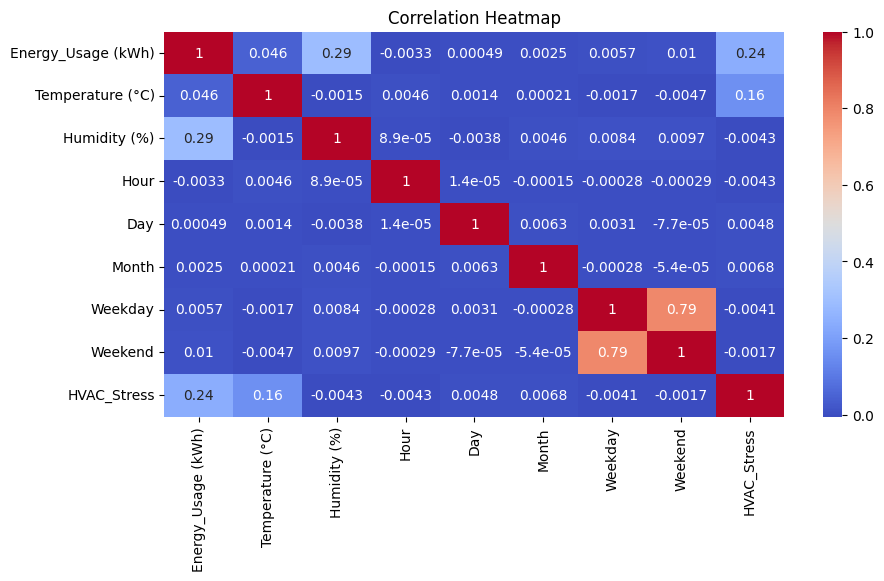

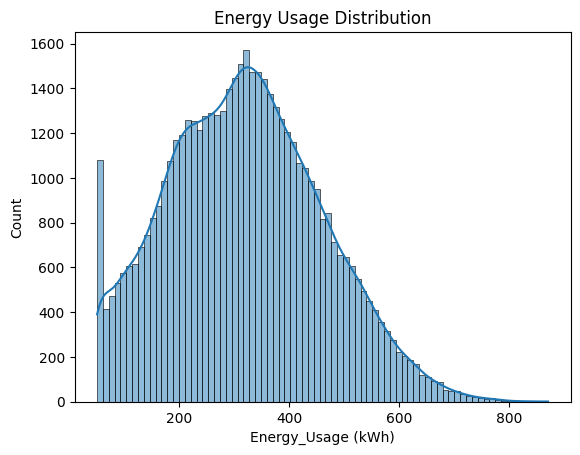

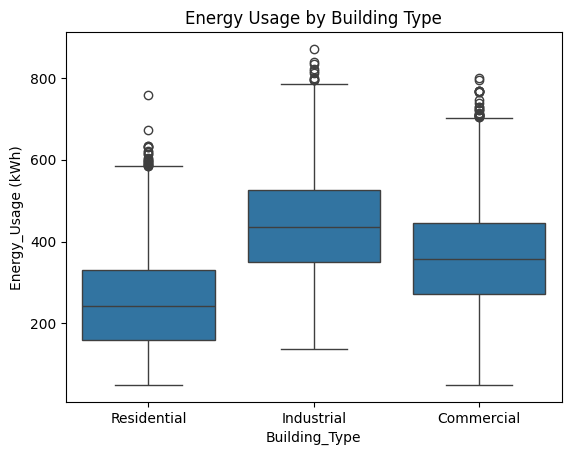


Encoding Completed Successfully.

✔ Preprocessing + Visualization + Encoding Completed


In [2]:
# ==============================================
# 📌 PREPROCESSING with AUTO-SAVE (YOUR FORMAT)
# ==============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("energy_usage_50000_no_season.csv")
print("Initial shape:", df.shape)

# ---- 1️⃣ Remove duplicates ----
df.drop_duplicates(inplace=True)

# ---- 2️⃣ Handle Missing Values ----
for col in df.columns:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# ---- 3️⃣ Convert Timestamp ----
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# ---- 4️⃣ Feature Engineering ----
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month
df["Weekday"] = df["Timestamp"].dt.weekday
df["Weekend"] = df["Weekday"].apply(lambda x: 1 if x >= 5 else 0)

df["HVAC_Stress"] = np.where(df["Temperature (°C)"] < 12,
                                 (12 - df["Temperature (°C)"]),
                           np.where(df["Temperature (°C)"] > 26,
                                    (df["Temperature (°C)"] - 26), 0))

print("After feature engineering:", df.shape)

# ---- 5️⃣ Visualization ----
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.histplot(df["Energy_Usage (kWh)"], kde=True)
plt.title("Energy Usage Distribution")
plt.show()

sns.boxplot(data=df, x="Building_Type", y="Energy_Usage (kWh)")
plt.title("Energy Usage by Building Type")
plt.show()

# ---- 6️⃣ Encoding ----
label_cols = ["Building_ID", "Building_Type", "Occupancy_Level"]
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nEncoding Completed Successfully.")

# ---- 7️⃣ SAVE IN YOUR REQUIRED FORMAT ----
df.to_csv("processed_energy_usage.csv", index=False)
print("\n✔ Preprocessing + Visualization + Encoding Completed")
